# Data cleaning and Preprocessing



## Contents

### 1. Introduction to Data Cleaning and Preprocessing
- Python Libraries for Data Cleaning and Preprocessing

### 2. Understanding Data Quality Issues
- Identifying Common Data Quality Issues
- Assessing Data Quality and Integrity
- Exploratory Data Analysis (EDA) for Data Quality Assessment
- Handling Duplicates and Redundant Data

### 3. Handling Missing Data
- Identifying and Understanding Missing Data
- Techniques for Handling Missing Data
- Introduction to Pandas for Missing Data Handling
- Advanced Missing Data Handling Techniques

### 4. Dealing with Outliers
- Understanding Outliers and Their Impact
- Outlier Detection Techniques
- Strategies for Handling Outliers
- Python Code Examples for Outlier Detection and Handling

### 5. Data Normalization and Scaling
- Understanding the Importance of Data Normalization and Scaling
- Techniques for Data Normalization
- Feature Scaling Techniques
- Implementing Data Normalization and Scaling with Python

### 6. Feature Selection and Extraction
- Introduction to Feature Selection and Extraction
- Techniques for Feature Selection
- Feature Extraction Methods
- Python Code Examples for Feature Selection and Extraction

### 7. Encoding Categorical Variables
- Understanding Categorical Variables and Their Challenges
- Techniques for Categorical Variable Encoding
- Dealing with High Cardinality and Rare Categories
- Python Code Examples for Categorical Variable Encoding

### 8. Handling Imbalanced Data
- Understanding Imbalanced Data and Its Impact on Machine Learning
- Techniques for Handling Imbalanced Classes
- Python Code Examples for Handling Imbalanced Data

### 9. Data Integration and Transformation Techniques
- Data Integration Approaches
- Data Transformation Techniques
- Handling Skewed Distributions and Nonlinear Relationships


## 1. Python Libraries

#### Pandas

In [53]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ragu8/ESSENTIAL_TOOLS_FOR_WORKING_WITH_DATA/main/iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


#### Numpy

In [54]:
import numpy as np
arr = np.array([1,2,3,4])
print(arr*2)

[2 4 6 8]


#### Matplotlib

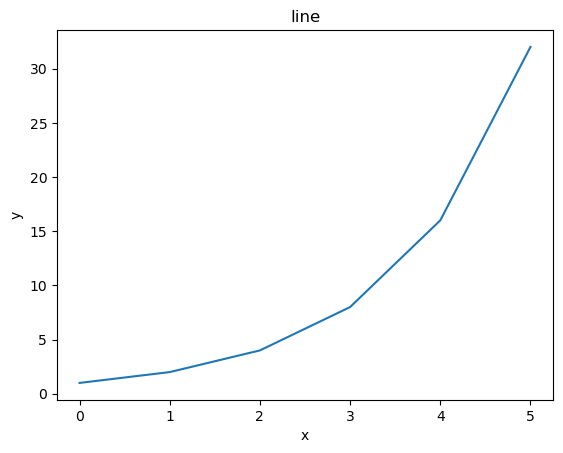

In [55]:
import matplotlib.pyplot as plt

plt.plot([1,2,4,8,16,32])
plt.title("line")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### Seaborn

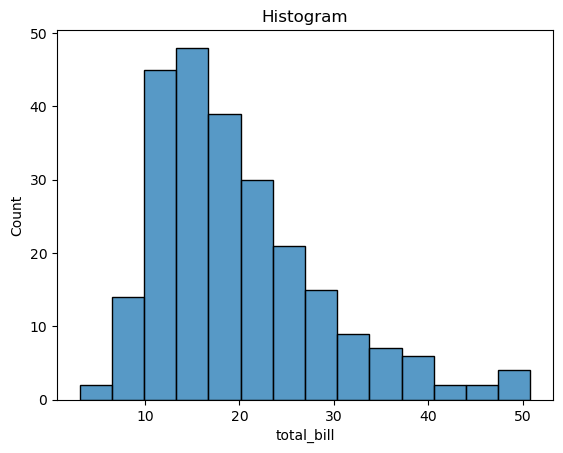

In [56]:
import seaborn as sns

df = sns.load_dataset('tips')

sns.histplot(df['total_bill'])
plt.title("Histogram")
plt.show()

#### Scikit-Learn

In [57]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

X = iris.data
y = iris.target

X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2)

## 2. Understanding Data Quality Issues

#### Missing Values

In [58]:
df = sns.load_dataset('tips')
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

#### Outliners

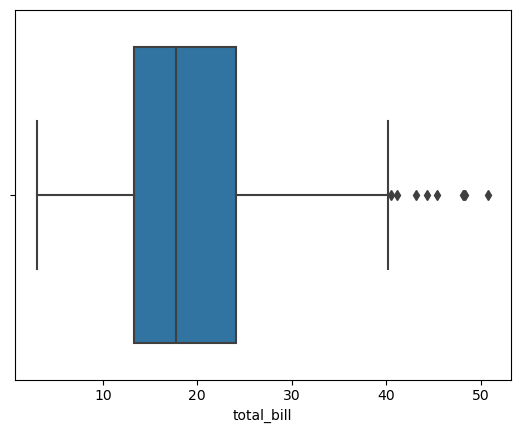

In [59]:
sns.boxplot(x=df['total_bill'])
plt.show()

#### Inconsistent Formatting

In [60]:
df["total_bill"] = pd.to_numeric(df['total_bill'] , errors='coerce')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Assessing Data Quality and Integrity

In [61]:
df.describe

<bound method NDFrame.describe of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

#### Exploratory Data Analysis  for Data Quality Assessment

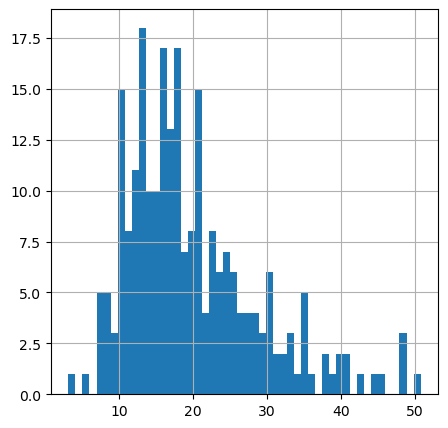

In [62]:
df['total_bill'].hist(bins=50,figsize=(5,5))
plt.show()

#### Handling Duplicates and Redundant Data

In [63]:
Duplicate_rows = df.duplicated()
print(Duplicate_rows)

df = df.drop_duplicates()
df.shape

0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Length: 244, dtype: bool


(243, 7)

## 3. Handling Missing Data

### Indentifying and Understanding Missing Data

In [64]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

- Missing Completely at Random (MCAR)
- Missing at Random (MAR)
- Missing Not at Random (MNAR)

### Techniques for Handling Missing Data

#### Deletion

In [65]:
df.dropna(inplace=True)
df

<ipython-input-65-b5dde2205341>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


#### Imputation

##### Mean/median/mode Imputation

In [66]:
df["total_bill"].fillna(df["total_bill"].mean(), inplace=True)
df["total_bill"].fillna(df["total_bill"].mode(), inplace=True)
df["total_bill"].fillna(df["total_bill"].median(), inplace=True)

/opt/apps/anaconda3/2020.11/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


##### Constant Value imputation

In [67]:
df["total_bill"].fillna(0,inplace=True)

##### Predictive imputation

This technique involves using statistical models or machine learning
algorithms to predict missing values based on other data. It's more accurate but also more
complex  (linear regression)

##### Introduction to pandas for missing Data Handling

In [68]:
df["total_bill"].fillna(method='ffill',inplace=True)
df["total_bill"].fillna(method='bfill',inplace=True)

### Advanced Missing Data Handling Techniques

#### Multiple Imputation

In [69]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


mice_imputer = IterativeImputer()

#df = mice_imputer.fit_transform(df)

## 4. Dealing with Outliers

#### Understanding Outliers and their impact

In [70]:
df['tip'].mean()

3.0023868312757203

In [71]:
df['tip'].mode()

0    2.0
dtype: float64

In [72]:
df['tip'].skew()

1.4598015326171103

In [73]:
df['tip'].std()

1.3850020372301455

In [74]:
quantiles = [0.25,0.5,0.75,1]
for quant in quantiles:
    print(df['tip'].quantile(quant))

2.0
2.92
3.575
10.0


#### Outlier Dectection Techniques

##### Statistical Methods

###### Z-score:

In [75]:
from scipy import stats

outlier_data = np.array([10, 20, 30, 40, 500])
z_scores = np.abs(stats.zscore(outlier_data))
outliers =outlier_data[z_scores > 1]
outliers

array([500])

###### IQR method:

In [76]:
Q1 = np.percentile(outlier_data, 25)
Q3 = np.percentile(outlier_data, 75)

IQR = Q3 - Q1

Condition = ((outlier_data < (Q1 -1.5 * IQR)) | (outlier_data > (Q3+1.5*IQR)))
outliers = outlier_data[Condition]
outliers

array([500])

#####  Visualization

###### Boxplot

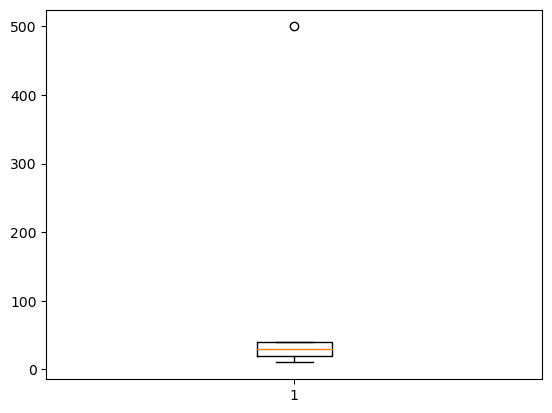

In [77]:
plt.boxplot(outlier_data)
plt.show()

###### Scatter Plot

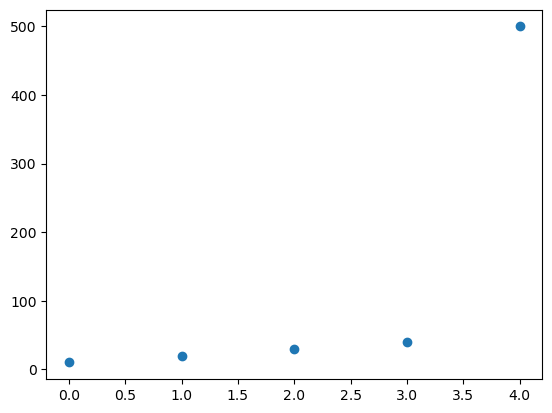

In [78]:
plt.scatter(range(len(outlier_data)),outlier_data)
plt.show()

##### Machine Learning 

In [79]:
from sklearn .ensemble import IsolationForest

clf = IsolationForest()

pred = clf.fit_predict(outlier_data.reshape(-1,1))
outliers = outlier_data[pred == -1]
outliers

array([500])

#### Strategies for Handling Outliers

#####   Deletion


In [80]:
filtered_data = outlier_data[(z_scores<=30)]
filtered_data

array([ 10,  20,  30,  40, 500])

##### Transformation

In [81]:
log_data = np.log(outlier_data)
log_data

array([2.30258509, 2.99573227, 3.40119738, 3.68887945, 6.2146081 ])

##### Machine Learning Models

Some machine learning models, like Random Forests and SVMs, are less sensitive to outliers.
Using these models could be a viable strategy when dealing with outliers.

## 5. Data Normalization and Scaling

#### Techniques for Data Normalization

##### Min-Max Scaling

In [82]:
from sklearn.preprocessing import MinMaxScaler

data = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1,1) # column wise
print(data)
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)
print(normalized_data)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[0.        ]
 [0.11111111]
 [0.22222222]
 [0.33333333]
 [0.44444444]
 [0.55555556]
 [0.66666667]
 [0.77777778]
 [0.88888889]
 [1.        ]]


##### Z-Score Normalization

In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)
print(standardized_data)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


##### Feature Scaling Techniques

Feature scaling is an umbrella term for techniques that change the range of a feature. In
addition to the aforementioned normalization techniques, the following methods are also used
for feature scaling:

##### Robust Scaling

In [84]:
from sklearn.preprocessing import RobustScaler

data = np.array([1,2,3,4,5,6,7,8,9,10,300]).reshape(-1,1)

scaler = RobustScaler()

roubust_scaled_data = scaler.fit_transform(data)

print(roubust_scaled_data)

[[-1. ]
 [-0.8]
 [-0.6]
 [-0.4]
 [-0.2]
 [ 0. ]
 [ 0.2]
 [ 0.4]
 [ 0.6]
 [ 0.8]
 [58.8]]


## 6 . Feature Selection and Extraction 

#### Techniques for Feature Selection

##### Filter Methods

In [110]:
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.datasets import load_iris

iris = load_iris()
x,y = iris.data, iris.target

x_new = SelectKBest(chi2,k=2).fit_transform(x,y)

print(x_new[:5])

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


##### Wrapper Methods

In [97]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.datasets import load_iris

iris = load_iris()
x, y = iris.data, iris.target

estimator = SVR(kernel='linear')
selector = RFE(estimator, n_features_to_select=2, step=2)
selector = selector.fit(x, y)

selected_indices = selector.support_
selected_data = x[:5, selected_indices]

print("Selected Data:")
print(selected_data)


Selected Data:
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


##### Embedded Methods

In [109]:
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression

x,y = make_regression(noise=4)

lasso = LassoCV().fit(x,y)
importance = np.abs(lasso.coef_)
importance[:5]

array([2.04146388e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.15811805e-03])

#### Feature Extraction Methods

##### Principal Component Analysis

In [115]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

x_pca = pca.fit_transform(x)
print(x[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


#####  T-Distributed Stochastic Neighbor Emdedding 

In [116]:
from sklearn.manifold import TSNE

x_tsne = TSNE(n_components=2).fit_transform(x)
print(x_tsne[:5])

[[-16.6989   -16.105661]
 [-16.544397 -18.945751]
 [-15.456986 -18.340258]
 [-15.651502 -18.903847]
 [-16.289274 -15.969597]]
